In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import xarray as xr
import os
import csv
import scipy
import pandas as pd
import matplotlib.colors
from matplotlib import cm
import netCDF4
from netCDF4 import Dataset
import scipy
from scipy.stats import pearsonr


<h3> Read in relevant data

In [21]:
timestep_data = pd.read_csv('SOM_example_data.csv', index_col = False)
node_data = pd.read_csv('example_nodes.csv', index_col = False)
node_data = node_data[node_data.columns[1:]].to_numpy()
node_assignments = pd.read_csv("example_node_assignments.csv")['x'].to_numpy()

<h3> Read in node results from csv file.


In [24]:
#grab the correct latitudes from the .nc file
spatial_file = xr.open_mfdataset('SOM_example_data.nc4')
lats = np.array(spatial_file.lat)

<h1>Plot Histogram of Pearson Correlation For All Nodes


In [31]:
timesteps = len(node_assignments)

correlations=np.empty(timesteps, dtype=float)
pvalues=np.empty(timesteps, dtype=float)
for j in range(timesteps):
    r,p=pearsonr(node_data[node_assignments[j]-1],timestep_data.iloc[j])
    correlations[j]=r
    pvalues[j]=p

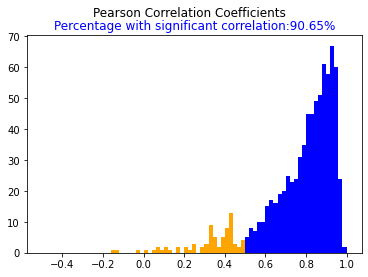

In [32]:

###make histogram of correlations!!!
bins1=np.linspace(-.5,1,76)
bins2=np.linspace(.5,1,26)
plt.hist(correlations,bins=bins1, color='orange')
plt.hist(correlations[correlations>=.5], bins=bins2,color='Blue')

correlations_pd=pd.DataFrame(correlations)
sig_correlations=correlations_pd.loc[correlations_pd[0]>=.5]
dec=len(sig_correlations)/len(correlations)
perc="{:.2%}".format(dec)

plt.suptitle('Pearson Correlation Coefficients')
plt.title(('Percentage with significant correlation:'+str(perc)),color='Blue');


# plt.savefig('example_pearson_figure.pdf')



In [33]:
correlations_pd=pd.DataFrame(correlations)
sig_correlations=correlations_pd.loc[correlations_pd[0]>=.5]
print('% of Pearson coefficients above .5:')
len(sig_correlations)/len(correlations)

% of Pearson coefficients above .5:


0.9064837905236908

In [40]:
pvalues_pd=pd.DataFrame(pvalues)
sig_pvalues=pvalues_pd.loc[pvalues_pd[0]<=.05]
print('% of signficant Pearson coefficients:')
len(sig_pvalues)/len(pvalues)

% of signficant Pearson coefficients:


0.9987531172069826

<h1>Plot Histogram of Pearson Correlation For Individual Node

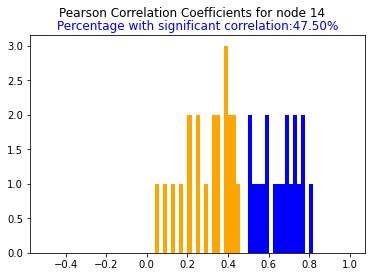

In [68]:
n = 14
index=np.where(node_assignments == n)[0].tolist()
node=node_data[n-1]
timesteps_mapped_to_node = timestep_data.iloc[index]

correlations=np.empty(len(index), dtype=float)
pvalues=np.empty(len(index), dtype=float)
for i in range(len(index)):
    r,p=pearsonr(node,timesteps_mapped_to_node.iloc[i])
    correlations[i]=r
    pvalues[i]=p


###make histogram of correlations
bins1=np.linspace(-.5,1,76)
bins2=np.linspace(.5,1,26)
plt.hist(correlations,bins=bins1, color='orange')
plt.hist(correlations[correlations>=.5], bins=bins2,color='Blue')

correlations_pd=pd.DataFrame(correlations)
sig_correlations=correlations_pd.loc[correlations_pd[0]>=.5]
dec=len(sig_correlations)/len(correlations)
perc="{:.2%}".format(dec)

plt.suptitle('Pearson Correlation Coefficients for node '+str(n))
plt.title(('Percentage with significant correlation:'+str(perc)),color='Blue');


# plt.savefig('example_pearson_figure_node'+str(n)+'.pdf')
